In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.shape

(18249, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
data=data.drop(['Unnamed: 0'],1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


unnamed data is not affecting the label of dataset

In [7]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['type'])
data['type']=df1

In [11]:
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(data['region'])
data['region']=df2

In [12]:
#data['Date']=pd.to_datetime(data['Date'])
#data['Month']=data['Date'].apply(lambda x:x.month)
#data['Day']=data['Date'].apply(lambda x:x.day)

In [13]:
data=data.drop(['Date','year'],1)

In [14]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


In [15]:
corr=data.corr().abs()
corr.shape
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
AveragePrice,1.000000,0.192752,0.208317,0.172928,0.179446,0.177088,0.174730,0.172940,0.117592,0.615845,0.011716
Total Volume,0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.232434,0.174176
4046,0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.225819,0.192073
4225,0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,0.232289,0.145726
4770,0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,0.210027,0.095252
Total Bags,0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.217788,0.175256
Small Bags,0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.220535,0.164702
Large Bags,0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.193177,0.198768
XLarge Bags,0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.175483,0.082281
type,0.615845,0.232434,0.225819,0.232289,0.210027,0.217788,0.220535,0.193177,0.175483,1.000000,0.000280


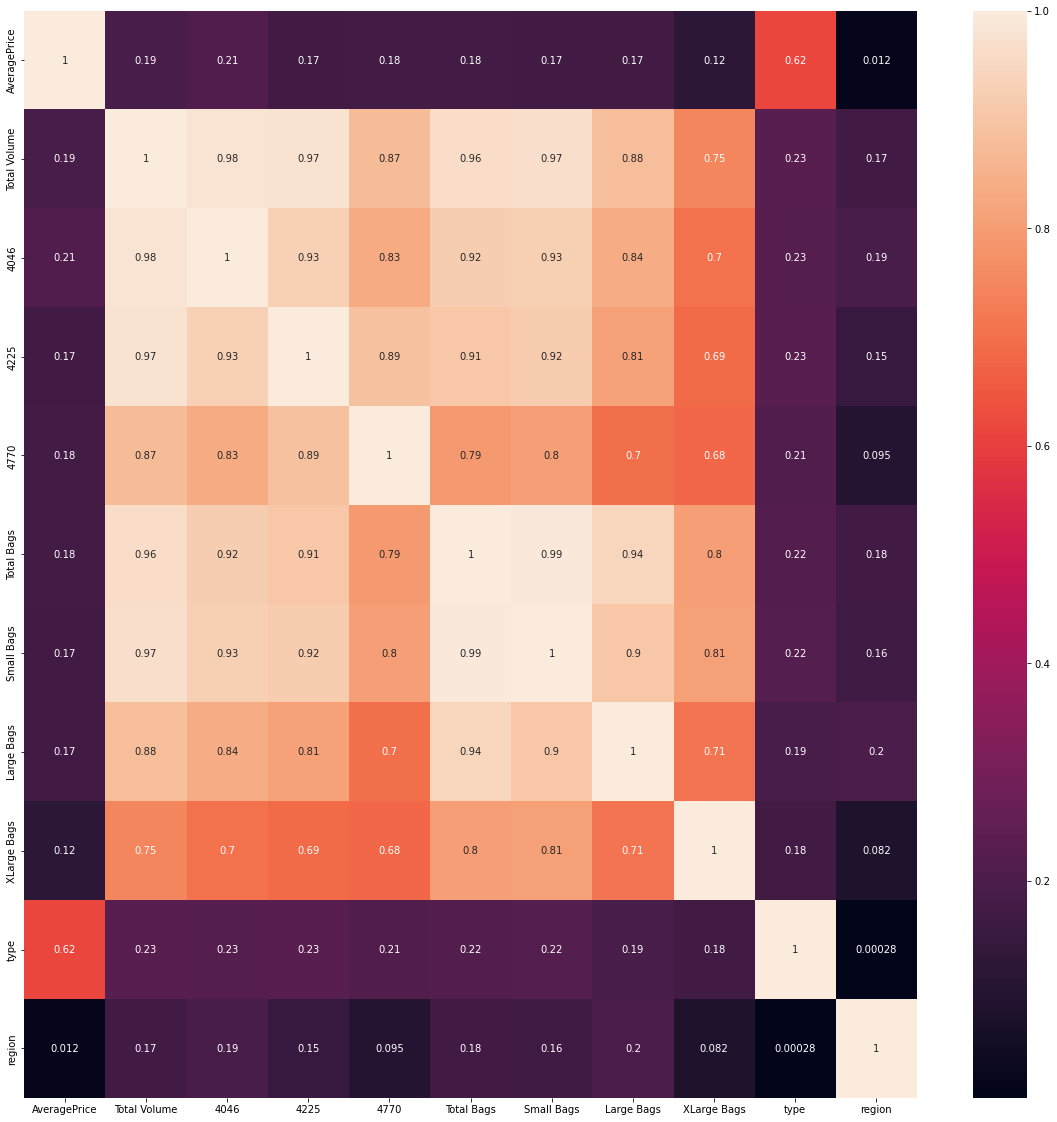

In [16]:
plt.figure(figsize=(20,20))

sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.show()

Total volume and total bags have been droped as it is showing multicolinearilty in data

In [17]:
data=data.drop(['Total Volume','Total Bags'],1)
data.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0


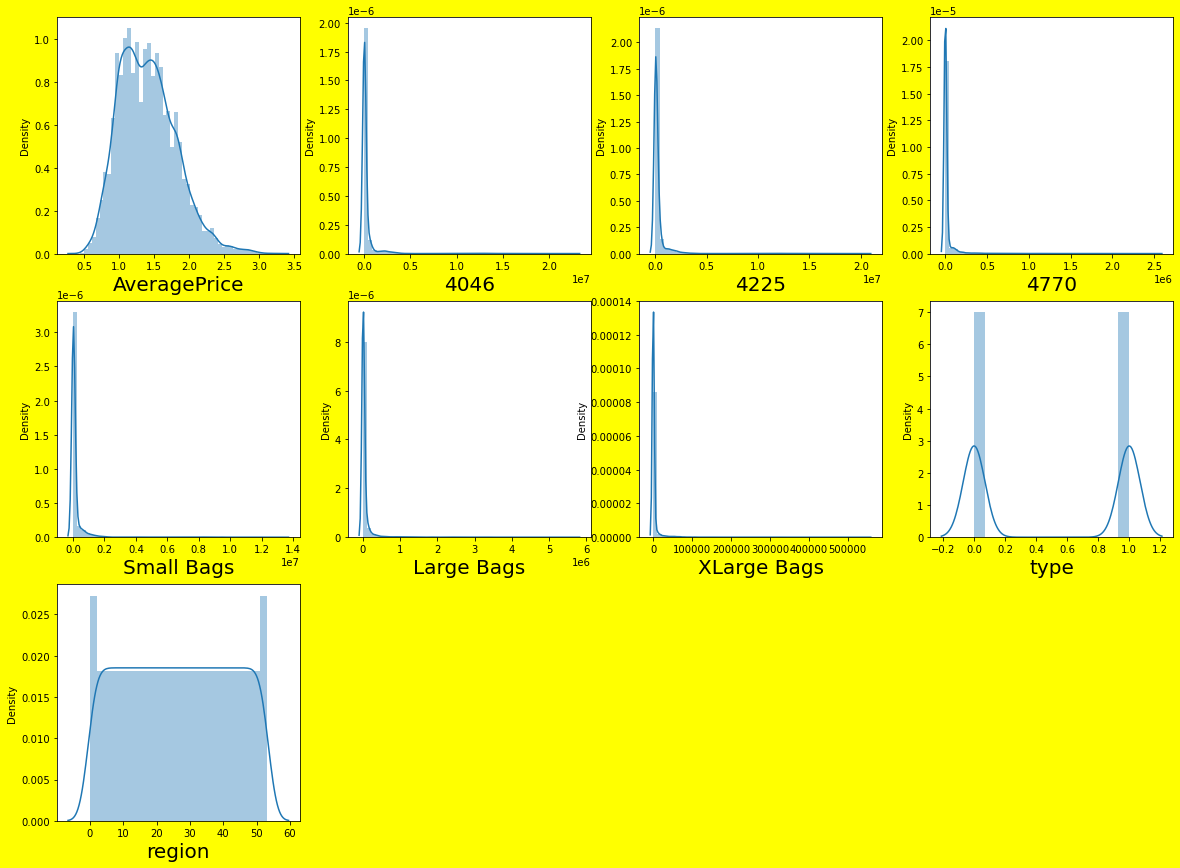

In [18]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

APPLYING Z SCORE TO REMOVE OUTLIERS  

In [27]:
from scipy.stats import zscore

In [28]:
z=np.abs(zscore(data))
z

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,0.188689,0.230816,0.199902,0.212091,0.232647,0.222352,0.17558,0.999836,1.700252
1,0.139020,0.231103,0.208054,0.211997,0.231568,0.222335,0.17558,0.999836,1.700252
2,1.182069,0.231007,0.154478,0.211325,0.233399,0.222311,0.17558,0.999836,1.700252
3,0.809551,0.230741,0.185350,0.211864,0.236568,0.222186,0.17558,0.999836,1.700252
4,0.312861,0.230891,0.208719,0.211834,0.236154,0.221924,0.17558,0.999836,1.700252
...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.230017,0.243857,0.212540,0.226665,0.220964,0.17558,1.000164,1.700811
18245,0.755023,0.230693,0.242277,0.212540,0.232196,0.221403,0.17558,1.000164,1.700811
18246,1.152375,0.230693,0.243090,0.205766,0.231644,0.222561,0.17558,1.000164,1.700811
18247,1.301382,0.230428,0.242651,0.205774,0.229543,0.222529,0.17558,1.000164,1.700811


In [29]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))
(18249, 9)


In [30]:
data=data[(z<3).all(axis=1)]
data

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53


In [31]:
print(data.shape)
#print(data_new.shape)
#data=data_new

(17651, 9)


Spliting the data in features and labels 

In [32]:
X=data.drop(['AveragePrice','region'],1)
z=data['AveragePrice']
y=data['region']

In [33]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=49)
y_train.head()

2640     50
13879    37
4832     38
10186    20
13430    28
Name: region, dtype: int32

# KNN CLASSIFIER

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier()

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred=knn.predict(x_test)
y_pred

array([ 0, 24, 22, ..., 17, 34, 33])

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[76,  0,  0, ...,  0,  0,  0],
       [ 0, 41,  0, ...,  0,  0,  0],
       [ 0,  0, 57, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 48,  1,  0],
       [ 0,  0,  0, ...,  0, 57,  0],
       [ 0,  6,  1, ...,  0,  0, 44]], dtype=int64)

In [41]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.57      0.84      0.68        90
           1       0.50      0.51      0.51        80
           2       0.78      0.85      0.81        67
           3       0.60      0.80      0.68        80
           4       0.67      0.82      0.74        73
           5       0.52      0.54      0.53        91
           6       0.89      0.94      0.91        77
           7       0.63      0.83      0.72        71
           8       0.92      0.91      0.91        99
           9       0.50      0.68      0.57        77
          10       0.52      0.49      0.51        87
          11       0.73      0.72      0.72       104
          12       0.80      0.75      0.77        84
          13       0.55      0.60      0.58        78
          14       0.65      0.73      0.69        67
          15       0.83      0.86      0.85        70
          16       0.66      0.51      0.57        83
          17       0.68    

# DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
clf.score(x_train,y_train)

1.0

In [46]:
y_pred1=clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.7749830047586675

In [47]:
cfm=confusion_matrix(y_test,y_pred1)
cfm

array([[69,  0,  0, ...,  0,  0,  0],
       [ 0, 48,  0, ...,  0,  0,  2],
       [ 0,  0, 60, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ..., 49,  0,  0],
       [ 0,  0,  0, ...,  0, 61,  0],
       [ 0,  1,  3, ...,  0,  0, 57]], dtype=int64)

In [48]:
print(classification_report(y_test,y_pred1,digits=2))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        90
           1       0.64      0.60      0.62        80
           2       0.83      0.90      0.86        67
           3       0.72      0.79      0.75        80
           4       0.85      0.85      0.85        73
           5       0.81      0.70      0.75        91
           6       0.95      0.94      0.94        77
           7       0.78      0.76      0.77        71
           8       0.94      0.86      0.90        99
           9       0.79      0.82      0.80        77
          10       0.77      0.64      0.70        87
          11       0.87      0.82      0.84       104
          12       0.87      0.82      0.85        84
          13       0.64      0.76      0.69        78
          14       0.63      0.67      0.65        67
          15       1.00      0.96      0.98        70
          16       0.88      0.88      0.88        83
          17       0.74    

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.4808836 , 0.66798867, 0.61473088, 0.55325779, 0.41813031])

In [51]:
cross_val_score(clf, X, y, cv=10).mean()

0.627439837792229

# RANDOM FOREST CLASSIFIER 

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rfc = RandomForestClassifier(n_estimators=20, random_state=0)

In [98]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [99]:
y_pred7 = rfc.predict(x_test)
y_pred7

array([ 0, 50, 22, ..., 17, 34, 33])

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred7))
print(classification_report(y_test,y_pred7))
print(accuracy_score(y_test, y_pred7))

[[79  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  2  2 ...  0  0 69]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        90
           1       0.71      0.64      0.67        80
           2       0.93      0.97      0.95        67
           3       0.81      0.84      0.82        80
           4       0.90      0.85      0.87        73
           5       0.78      0.71      0.75        91
           6       0.94      0.96      0.95        77
           7       0.90      0.92      0.91        71
           8       1.00      0.90      0.95        99
           9       0.80      0.94      0.86        77
          10       0.81      0.84      0.82        87
          11       0.93      0.88      0.91       104
          12       0.93      0.90      0.92        84
          13       0.76      0.77      0.76        78
          14       0.79      0.78

In [101]:
from sklearn.model_selection import cross_val_score

In [113]:
scores = cross_val_score(rfc, X, y, cv=10)
scores

array([0.80294451, 0.77280453, 0.8       , 0.76770538, 0.79036827,
       0.68328612, 0.64022663, 0.64419263, 0.67648725, 0.69745042])

In [104]:
cross_val_score(rfc, X, y, cv=10).mean()

0.7275465753820192

# choosing random forest classifier for predicting 

# REGRESSION FOR AVERAGE PRICE

In [66]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X_scaled,z,test_size=.25,random_state=49)
y_train1.head()

2640     0.97
13879    1.72
4832     0.97
10186    2.19
13430    1.96
Name: AveragePrice, dtype: float64

# LINEAR REGRESSION

In [67]:
regression=LinearRegression()
regression.fit(x_train1,y_train1)

LinearRegression()

In [68]:
regression.score(x_train1,y_train1)

0.40466471855956143

In [69]:
regression.score(x_test1,y_test1)

0.4036370776201871

In [70]:
y_pred3=regression.predict(x_test1)

In [71]:
y_pred3

array([1.19826398, 1.13529782, 1.64368475, ..., 1.6429014 , 1.17939063,
       1.64235158])

# ADA BOOST REGRESSOR

In [72]:
from sklearn.ensemble import AdaBoostRegressor

In [73]:
ada=AdaBoostRegressor()

In [74]:
ada.fit(x_train1,y_train1)

AdaBoostRegressor()

In [75]:
y_pred4=ada.predict(x_train1)

In [76]:
from sklearn import metrics

In [77]:
accuracy=metrics.r2_score(y_train1,y_pred4)
accuracy

0.4764468880956565

In [78]:
y_test_pred=ada.predict(x_test1)

In [79]:
accuracy=metrics.r2_score(y_test1,y_test_pred)
accuracy

0.46098069425439925

# XGB REGRESSOR

In [80]:
import xgboost as xgb

In [81]:
xgb=xgb.XGBRegressor()

In [82]:
xgb.fit(x_train1,y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [83]:
y_pred5=xgb.predict(x_test1)
y_pred5

array([1.4138099, 1.1807243, 1.4970776, ..., 1.8455048, 1.0090731,
       1.6975718], dtype=float32)

In [84]:
from sklearn.metrics import r2_score

In [85]:
r2_score(y_test1,y_pred5)

0.7144781751849268

# RANDOM FOREST REGRESSOR 

In [106]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train1, y_train1)
y_pred8 = regressor.predict(x_test1)

In [108]:
y_pred8

array([1.4195, 1.1795, 1.408 , ..., 1.95  , 0.995 , 1.745 ])

In [109]:
r2_score(y_test1,y_pred8)

0.7428442014345114

In [107]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred8))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred8))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred8)))

Mean Absolute Error: 0.13637684115114435
Mean Squared Error: 0.03783748538409245
Root Mean Squared Error: 0.19451859906983818


# Choosing random forest regressor for finding average price 

# Saving the Model 

In [116]:
import pickle

In [122]:
filename='region'
pickle.dump(rfc,open(filename,'wb'))
loaded_model1=pickle.load(open(filename,'rb'))

In [120]:
filename='Average price'
pickle.dump(regressor,open(filename,'wb'))
loaded_model2=pickle.load(open(filename,'rb'))